In [1]:
import numpy as np 
import cv2
import os

In [2]:
from operator import itemgetter

In [3]:
import imageio
import time
import imutils
from collections import deque
import operator
import matplotlib.pyplot as plt
from pylab import rcParams

In [4]:
rcParams['figure.figsize'] = 12,8

In [5]:
from Sport_Camera_Modules import *

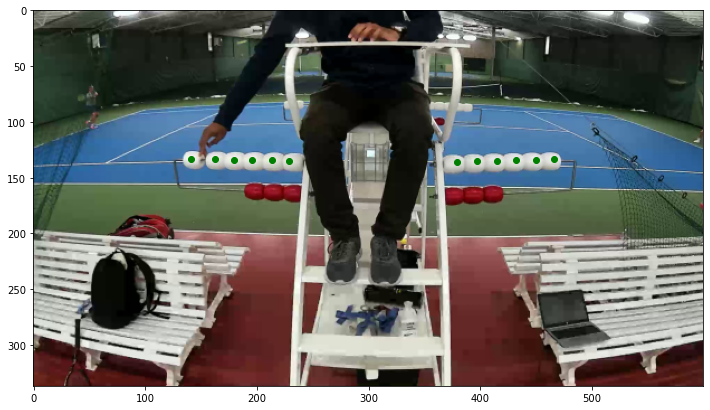

Set  0
{'Player 1': 1, 'Player 2': 0}


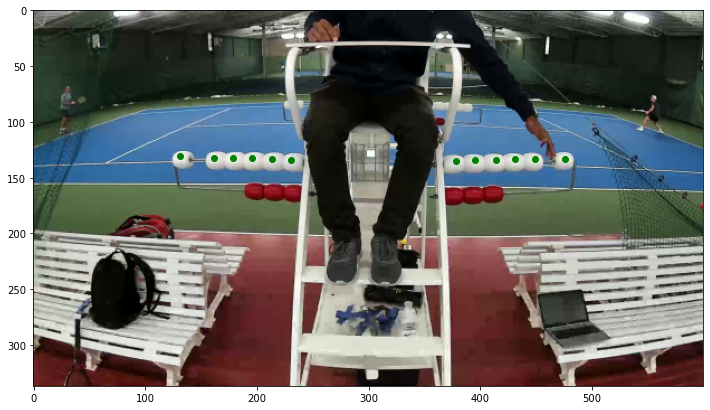

Set  0
{'Player 1': 1, 'Player 2': 1}


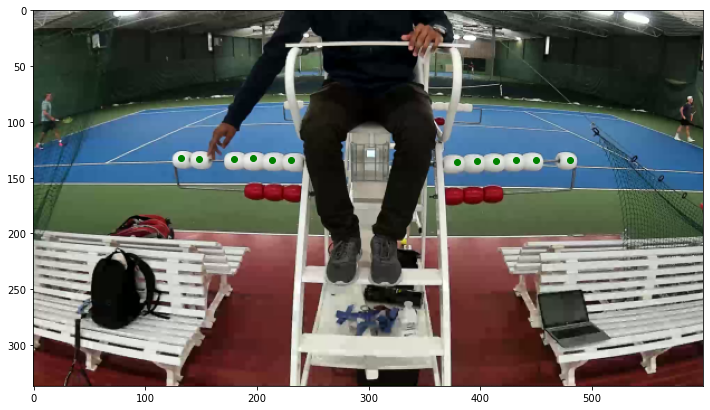

Set  0
{'Player 1': 2, 'Player 2': 1}


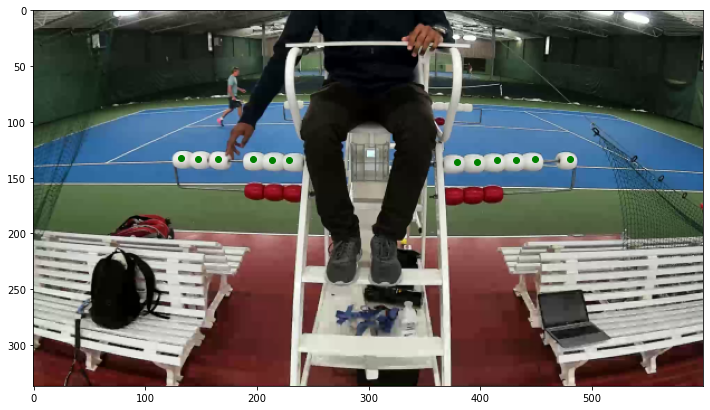

Set  0
{'Player 1': 3, 'Player 2': 1}


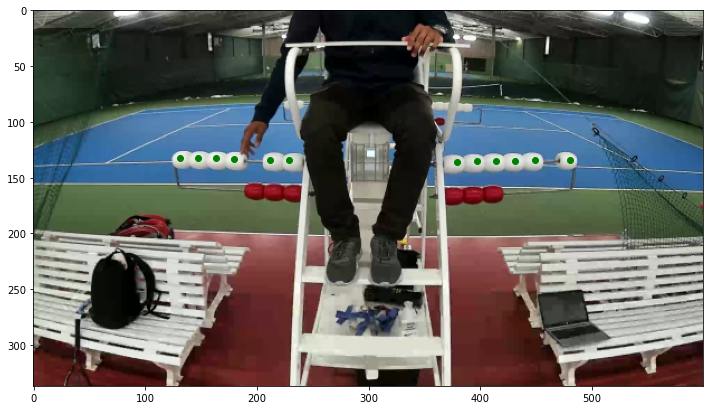

Set  0
{'Player 1': 4, 'Player 2': 1}


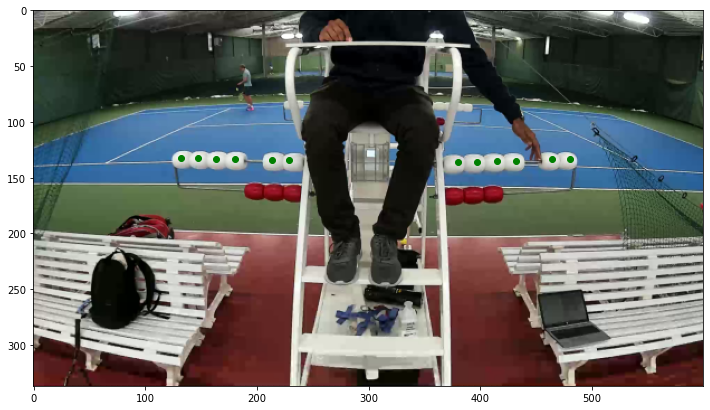

Set  0
{'Player 1': 4, 'Player 2': 2}


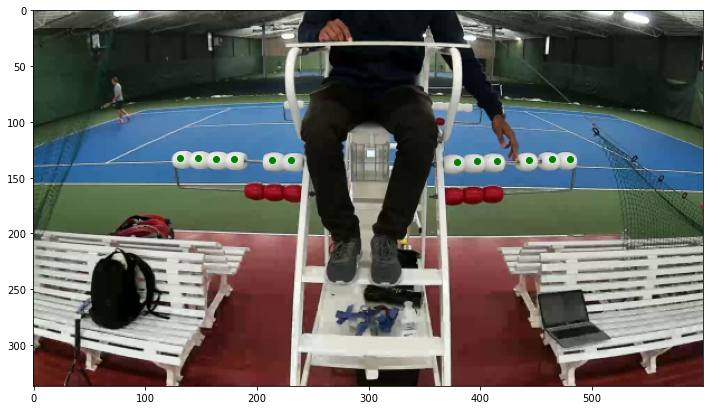

Set  0
{'Player 1': 4, 'Player 2': 3}


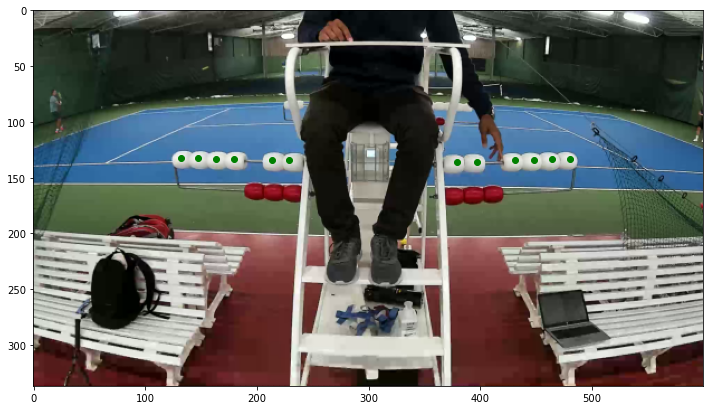

Set  0
{'Player 1': 4, 'Player 2': 4}


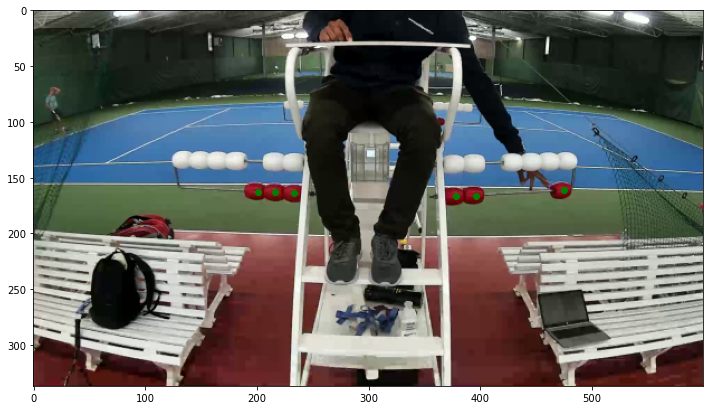

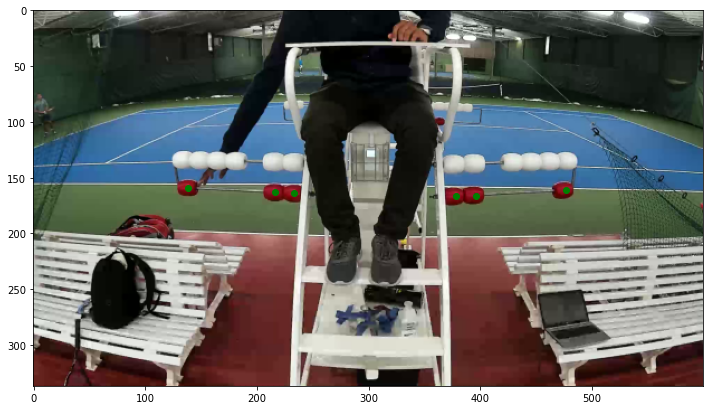

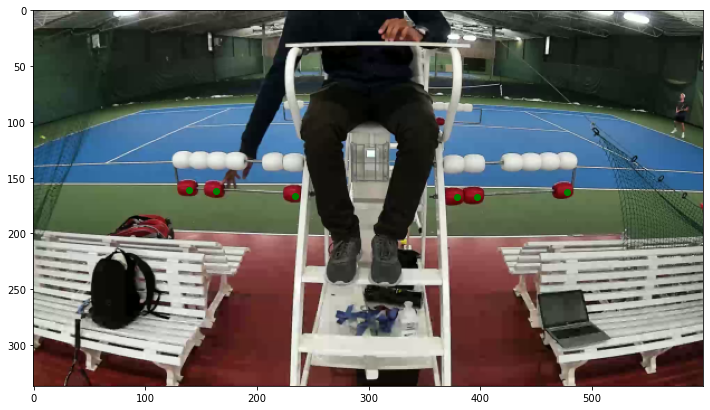

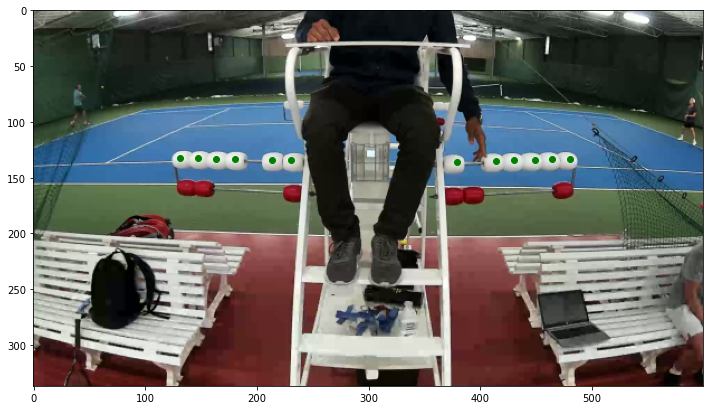

Set  2
{'Player 1': 0, 'Player 2': 1}


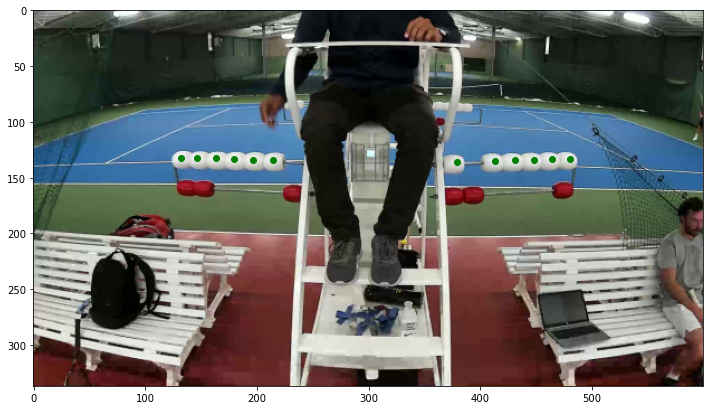

Set  2
{'Player 1': 0, 'Player 2': 2}


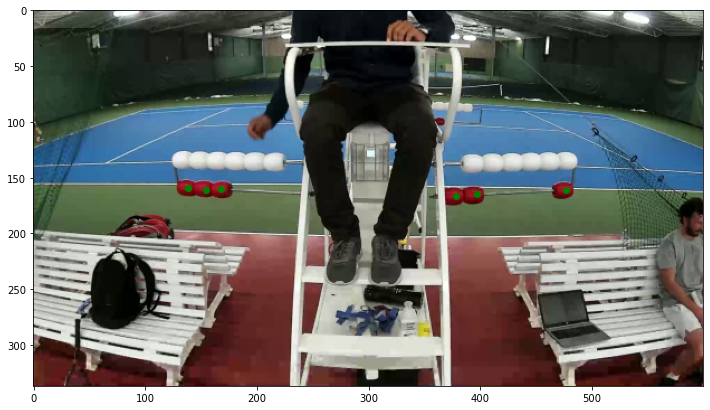

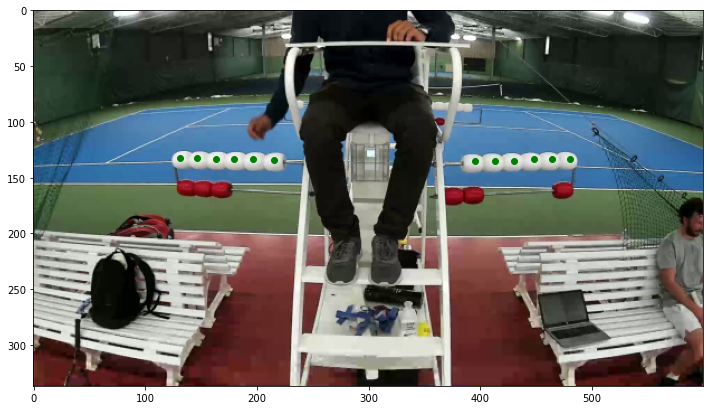

Set  3
{'Player 1': 0, 'Player 2': 1}


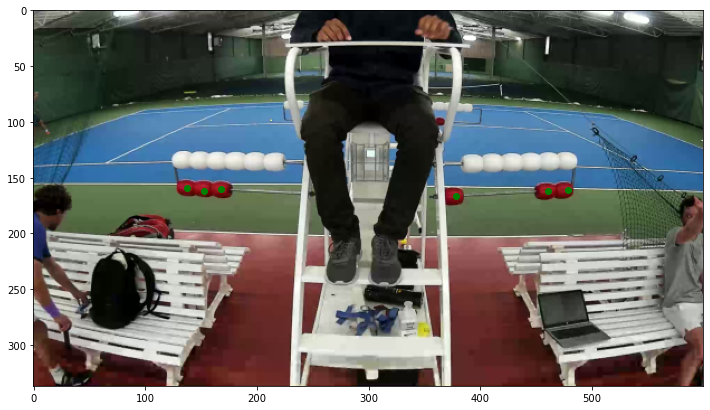

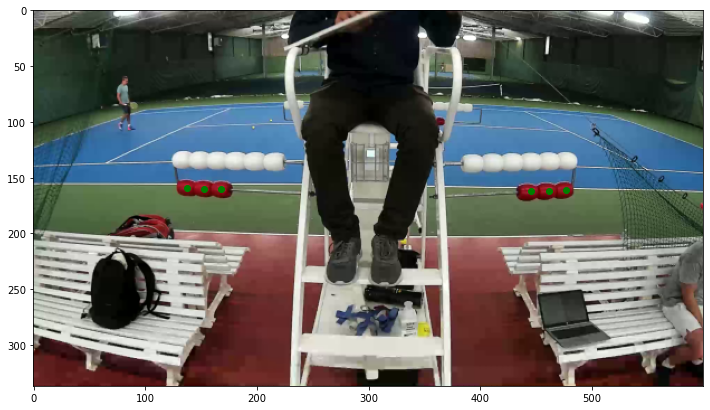

In [7]:
vs = cv2.VideoCapture(r'C:\Users\Darya\Downloads\4.mp4')
time.sleep(2.0)

list_pts_r = [deque(maxlen=10) for i in range(7)]
list_pts_w = [deque(maxlen=10) for i in range(13)]

(dX, dY) = (0, 0)
num_frame = 0

lower_red = np.array([60,180,100])
upper_red = np.array([255,235,180])

red_balls_moved = []
white_balls_moved = []
current_set = 0
score = [{'Player 1': 0, 'Player 2': 0} for i in range(6)]
frames_check = []    
balls_moved = []  
prev_score_r, prev_score_w = None, None

while True:
    frame = vs.read()
    if frame[1] is None:
        break
        
    if (num_frame % 30 == 0): 
#         print('Frame number ', num_frame + 1)
        list_centers_r, list_pts_r = get_list_pts(frame, list_pts_r, color = 'red', correct=False, show=False)
        list_centers_w, list_pts_w = get_list_pts(frame, list_pts_w, color = 'white', correct=False, show=False)

        if len(list_centers_r) != 6:
            list_centers_r, list_pts_r = get_list_pts(frame, list_pts_r, color = 'red', correct=True, show=False)
        if len(list_centers_w) != 12:
            list_centers_w, list_pts_w = get_list_pts(frame, list_pts_w, color = 'white', correct=True, show=False)
 

        if len(list_centers_r) != 6 or len(list_centers_w) != 12: 
            frames_check.append(frame[1])
            num_frame += 1
            continue

        ds_r = calc_ds(list_pts_r)
        ds_w = calc_ds(list_pts_w)
        
        red_balls_moved, appended_r = check_ball_move(ds_r, 40, red_balls_moved, list_centers_r, frame, prev_score_r)
        if appended_r: 
            prev_score_r = red_balls_moved[-1]
            if red_balls_moved.count(red_balls_moved[-1]) == 1: 
                if red_balls_moved[-1] <=3:
                    current_set += 1
        white_balls_moved, appended_w = check_ball_move(ds_w, 5, white_balls_moved, list_centers_w, frame, prev_score_w)
        if appended_w: 
            prev_score_w = white_balls_moved[-1]
            if white_balls_moved.count(white_balls_moved[-1]) == 1: 
                if white_balls_moved[-1] <= 5:
                    score[current_set]['Player 1'] += 1
                else: 
                    score[current_set]['Player 2'] += 1
            print ('Set ', current_set)
            print (score[current_set])

    num_frame += 1
    
vs.release()

cv2.destroyAllWindows()